# PROYECTO ANÁLISIS DE DATOS DE VENTAS DE EMPRESA ICE - Videojuegos

El análisis se centra en la tienda online Ice que vende videojuegos por todo el mundo. La base de datos proporcionada contiene reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos. El objetivo principal de esta investigación es identificar patrones que determinen si un juego tiene éxito o no, para poder detectar proyectos prometedores y planificar campañas publicitarias para los próximos años.

---

## Etapas del proyecto 

La investigación se llevará a acabo en distintas etapas para potenciar el uso correcto de los datos, la claridad en los hallazgos y evitar al máximo los errores de análisis e interpretación. 

Es por esto que una primera etapa será de (1) Preparación de Datos, donde se corregirán errores de presentación, como nombres de columnas (si son poco adecuados), errores de contenido como elementos duplicados y/ valores ausentes, además del tipo de dato adecuado para cada valor de información (object, float, int, datetime, etc).
Habiendo procesado los datos se seguirá con una extensa etapa de (2) Manejo y Análisis de Datos, donde, en principio se decidirá los datos adecuados para analizar y evaluar por ejemplo: ventas globales, las plataformas de juego, cómo las reseñas de los juegos afectan las ventas por plataforma, qué géneros son aquellos que registran más ventas, entre otros. Adicionalmente, se creará un perfil de usuario para Norteamérica, Europa y Japón, donde se determinará las cinco plataformas principales de ventas, los cinco géneros de videojuegos más populares y como las clasificaciones de ESRB afectan a las ventas por cada región.  

Por último, se realizará un (3) Análisis Estadístico donde se probarán las hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.     


Finalmente, este trabajo se sintetizará en un último apartado de conclusiones generales. 

---


## Información de la Base de Datos 

La Base de Datos contiene información del año 2016 y se pretende idear y/o planificar una campaña publicitaria para 2017.

Descripción de datos: 

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Notas a considerar:

* Es posible que los datos de 2016 estén incompletos.

* El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

### ETAPA 1: PREPARACIÓN DE LOS DATOS

En principio, se importarán las librerías necesarias para trabajar con la base de datos, se leerá la información y se corregirán errores de presentación, como nombres de columnas (si son poco adecuados), errores de contenido como elementos duplicados y/ valores ausentes, además del tipo de dato adecuado para cada valor de información (object, float, int, datetime, etc)

In [79]:
#importamos las librerias necesarias para desarrollar el proyecto
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy import stats as st

In [80]:
#leemos la base de datos 'games' y echamos un primer vistazo a las columnas
df_games = pd.read_csv('games.csv')
df_games.info() #con info() visualizamos datos basicos como los nombres de las columnas y la cantidad de filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [81]:
df_games.columns #mostar los nombres de las columnas

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Se observan datos conflictivos como: (1) las columnas contienen mayúsculas, (2) Algunos tipos de datos son incorrectos. Se realizará un cambio en el nombre de las columnas que respete el formato snake_case y los tipos de datos se ajustarán a los adecuados. 

In [82]:
#cambiar el nombre de las columnas a formato snake_case 
new_col_names = [] # creo una lista vacía donde iran los nuevos nombres de las columnas 

for col in df_games.columns: #para cada columna aplico la funcion lower para poner todas las letras en minúscula 
    col_name = col.lower()
    new_col_names.append(col_name) #agrego los nuevos nombres a la lista vacía


df_games.columns = new_col_names #reemplazo los nombres antiguos por los correctos de la lista new_col_names
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [83]:
#cambiar los datos de float a int
#primero rellenamos los datos vacíos con -1, este número inusual indica que NO se ingresó el dato solicitado de año o de score
df_games[['year_of_release', 'critic_score', 'user_score']] = df_games[['year_of_release', 'critic_score', 'user_score']].fillna(-1)

#se convierte de float a int los años de lazamiento de los juegos y critic score
df_games[['year_of_release','critic_score']] = df_games[['year_of_release','critic_score']].astype(int)

#se convierte 'user_score' de tipo object a float
# la asginación "tbd" se tratará como un dato ausente, por lo que se reemplazará por un -1 
df_games['user_score'] = df_games['user_score'].replace('tbd', -1) 
df_games['user_score'] = df_games['user_score'].astype(float)
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN


In [84]:
#identificar más valores ausentes

df_games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

In [85]:
#para las columnas 'name', 'genre' y 'rating' se reemplazará los datos ausentes por 'Unknown'
df_games[['name', 'rating', 'genre']] = df_games[['name', 'rating', 'genre']].fillna('unknown')
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown


In [86]:
#se comprueba nuevamente la ausencia de valores nulos 
df_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [87]:
#identificar filas duplicadas 
df_games.duplicated().sum()

0

Se identificaron valores ausentes en las columnas 'year_of_release', 'critic_score', 'user_score', 'rating', 'name' y 'genre'; en todas excepto estas tres últimas, se rellenaron los valores ausentes con un valor 'absurdo' y que estuviera fuera de los rangos normales de clasificación, para esto se decidió utilizar -1. Es importante destacar que este valor no se utilizará en futuros análisis cuantitativos, es solo una mera forma de identificación rápida. Para el caso particular de la columna 'user_score', se decidió tratar el dato 'tbd' como un valor ausente también, por no formar parte del rango normal de clasificación (números de 1.0 a 10.0).

Por otro lado, los valores ausentes de las columnas 'rating', 'name' y 'genre', al ser te tipo object, fueron rellenados con 'unknown' para su rápida identificación. 

Los datos ausentes corresponden principalmente a 'scores' de los juegos, esto puede deberse a que no todos los usuarios consumidores de videojuegos vuelven a rankearlos o, en el caso de los años de lanzamiento o rating, puede deberse también, a problemas técnicos o a errores en la entrada de datos. 

Con respecto a los tipos de datos, se modificaron las columnas 'year_of_release' y 'critic_score' de float a int, por no contener factores decimales. Y la columna 'user_score' de object a float, por ser sus datos principalmente números. Todo lo anterior facilitará futuros análisis cualitativos. 

Por último, no se identificaron filas duplicadas.


Luego de este procesamiento de datos, se considera lista la base de datos para realizar los análisis. 


### ETAPA 2: MANEJO Y ANÁLISIS DE DATOS

#### Análisis de ventas 

In [88]:
#calculo de las ventas totales de cada juego en una nueva columna
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01


In [89]:
#visualizar la cantidad de juegos lanzados por año. 
game_per_year = df_games.groupby('year_of_release')['name'].count().reset_index().sort_values(by='name')
game_per_year

,year_of_release,name
1,1980,9
5,1984,14
6,1985,14
9,1988,15
8,1987,16
11,1990,16
4,1983,17
10,1989,17
7,1986,21
3,1982,36


A través de la visualización de la cantidad de juegos lanzados por año, se tiene registro desde el año 1980 hasta 2016, donde 1980 es el año con menos lanzamientos de juegos, registrados solo 9. Por otro lado, los años 2008 y 2009 fueron aquellos con más juegos lanzados, con una cantidad de 1427 y 1426 respectivamente, siguiendoles el año 2010 con 1255. 

Cabe destacar que el año 2016 (a la fecha de obtenida esta base de datos), registra solo 502 videojuegos lanzados. 
Adicionalmente, existen 269 juegos sin registro de su año de lanzamiento, de un total de 16715. 

In [90]:
#se calculan las ventas totales por plataforma
sales_per_platform = df_games.groupby(['platform'])['total_sales'].sum().reset_index() #se agrupa por plataforma y se obtienen ventas totales
sales_per_platform.sort_values(by='total_sales', ascending = False) #se ordenan de mayor a menor

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Las plataformas con mayores ventas totales registradas en millones de dolares estadounidenses a la fecha en la base de datos (años 1980-2016), han sido
* PS2 = 1255.77
* X360 = 971.42
* PS3 = 939.65
* Wii = 907.51
* DS = 806.12
* PS = 730.86
* GBA = 317.85

Seguidas de PS4 con 314.14 millones de dólares estadounidenses. Cabe destacar que estas ventas totales incluyen solamente las regiones de Norteamérica, Europa y Japón. 

A continuación se creará un gráfico de distribución con las ventas de las plataformas más populares. 
Para esto se creará un df a partir de la base de datos original, con solo estas plataformas.

In [91]:
#se agrupa la base de datos con las ventas anuales de cada plataforma. 
tabla_ventas_por_plataforma_y_año = pd.pivot_table(df_games, values='total_sales', index='year_of_release', columns='platform', aggfunc='sum', fill_value=0)

#se elimina la fila que contiene los datos de plataforma pero con año de lanzamiento no registrado (-1)
tabla_ventas_por_plataforma_y_año.drop(-1, inplace=True)

tabla_ventas_por_plataforma_y_año

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [92]:
#cortamos la tabla y solo nos quedamos con las plataformas de interés 
ventas_populares = tabla_ventas_por_plataforma_y_año[['PS2','X360', 'PS3', 'Wii', 'DS','PS', 'GBA']]
ventas_populares


platform,PS2,X360,PS3,Wii,DS,PS,GBA
year_of_release,,,,,,,
1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.00,0.00,0.00,0.00,0.02,0.00,0.00
1986,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<Figure size 10000x1500 with 0 Axes>

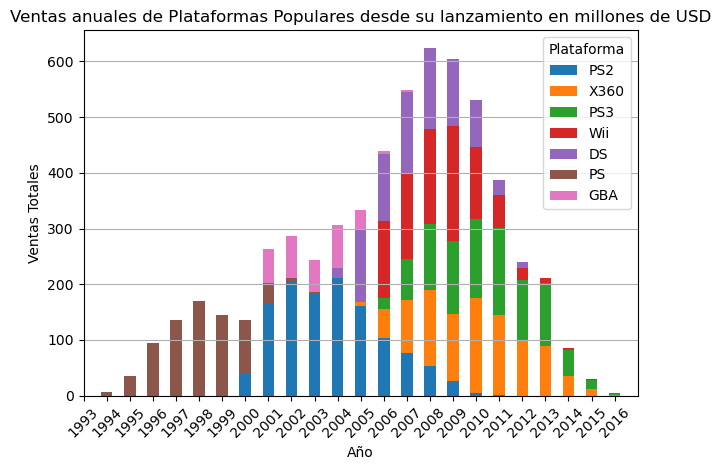

In [93]:
# Crear el gráfico de barras para las plataformas mas populares 
plt.figure(figsize=(100, 15))
ventas_populares.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.title("Ventas anuales de Plataformas Populares desde su lanzamiento en millones de USD")
plt.legend(title='Plataforma')
plt.grid(axis='y')
plt.xlim([13, 37])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A través del gráfico es posible visualizar que los años en que los videojuegos más populares alzanzaron su pick en ventas fueron 2008, 2009, 2007 y 2010.

In [94]:
#las plataformas con menos ganancias totales
df_games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales')

,platform,total_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.86
3,DC,15.95
8,GEN,30.77
21,SAT,33.59


Las plataformas con menos recaudación total (en millones de dólares estadounidenses), por ventas han sido:
* PCFX = 0.03
* GG =	0.04
* 3DO = 0.10
* TG16 = 0.16
* WS = 1.42
* NG = 1.44
* SCD = 1.86

In [95]:
#ganancias anuales de las plataformas menos populares 
ventas_menos_populares = tabla_ventas_por_plataforma_y_año[['PCFX','GG', '3DO', 'TG16', 'WS','NG', 'SCD']]
ventas_menos_populares

platform,PCFX,GG,3DO,TG16,WS,NG,SCD
year_of_release,,,,,,,
1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [96]:
#responderemos la pregunta: cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

#Buscamos las plataformas que solían ser populares pero que ahora no tienen ventas
def plataformas_sin_ventas_ultimo_año(tabla):
    plataformas_sin_ventas = []  # creamos una lista vacía donde iran las plataformas
    for columna in tabla.columns: 
        if tabla.loc[2016, columna] == 0: # aquellas columnas (plataformas) que al año 2016 no registren ventas
            plataformas_sin_ventas.append(columna) # la plataforma se agrega a la lista 
    return plataformas_sin_ventas

plataformas_sin_ventas_ultimo_año(tabla_ventas_por_plataforma_y_año)

['2600',
 '3DO',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PCFX',
 'PS',
 'PS2',
 'PSP',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'XB']

In [97]:
#cuando aparecieron las plataformas más populares y que se mantienen en ventas a 2016

def calcular_tiempo_aparicion_desaparicion(plataforma, tabla):
    primer_año = None #creamos la primera variable vacía, se rellenará luego con el año de inicio de la plataforma 
    ultimo_año = None #segunda variable vacía, se rellenará luego con el año de término de la plataforma
    for año in tabla.index:  # se itera sobre los años 
        if tabla.loc[año, plataforma] > 0: #se verifica si la plataforma tuvo ventas ese año
            if primer_año is None: #si es el primer año con ventas de esa plataforma, se almacena en primer año
                primer_año = año
            ultimo_año = año  #siempre se actualiza ultimo_año mientras haya  ventas en años posteriores

    #despues de la iteracion, se comprueba si encontramos el primer y ultimo año con ventas 
    if primer_año is not None and ultimo_año is not None:
        tiempo_aparicion = tabla.index[-1] - primer_año  # año 2016 menos el primer año en que se lanzó el juego en esa plataforma
        tiempo_desaparicion = tabla.index[-1] - ultimo_año #año 2016 menos el ultimo año en que se registraron ventas de ese juego
        return tiempo_aparicion, tiempo_desaparicion
    else:
        return None, None

plataformas_sin_ventas = plataformas_sin_ventas_ultimo_año(tabla_ventas_por_plataforma_y_año) #lista de las platafromas sin ventas a 2016

#se itera en las columnas (plataformas)
for plataforma in tabla_ventas_por_plataforma_y_año.columns:
    if plataforma not in plataformas_sin_ventas: # se calcula el tiempo de aparicion y desaparicion de las plataformas que no estan en la lista
        tiempo_aparicion, tiempo_desaparicion = calcular_tiempo_aparicion_desaparicion(plataforma, tabla_ventas_por_plataforma_y_año)
        if tiempo_aparicion is not None and tiempo_desaparicion is not None:
            print(f'Plataforma: {plataforma}, Tiempo de aparición: {tiempo_aparicion} años, Tiempo de desaparición: {tiempo_desaparicion} años')

Plataforma: 3DS, Tiempo de aparición: 5 años, Tiempo de desaparición: 0 años
Plataforma: PC, Tiempo de aparición: 31 años, Tiempo de desaparición: 0 años
Plataforma: PS3, Tiempo de aparición: 10 años, Tiempo de desaparición: 0 años
Plataforma: PS4, Tiempo de aparición: 3 años, Tiempo de desaparición: 0 años
Plataforma: PSV, Tiempo de aparición: 5 años, Tiempo de desaparición: 0 años
Plataforma: Wii, Tiempo de aparición: 10 años, Tiempo de desaparición: 0 años
Plataforma: WiiU, Tiempo de aparición: 4 años, Tiempo de desaparición: 0 años
Plataforma: X360, Tiempo de aparición: 11 años, Tiempo de desaparición: 0 años
Plataforma: XOne, Tiempo de aparición: 3 años, Tiempo de desaparición: 0 años


Existen, a la fecha de obtenida esta base de datos, 9 plataformas que al año 2016 siguen activas en el mercado (registran ventas). Se puede observar que no existe un patrón dependiente del año de lanzamiento de las plataformas, ya que existe una gran variabilidad en este aspecto. Desde 3 años hasta décadas. 

In [98]:
#llamamos a la función y obtenermos las plataformas que ya no son populares, su año de aparición y desaparición 
print("Plataformas que solían ser populares pero ahora no tienen ventas:")
print(plataformas_sin_ventas)
print()

for plataforma in plataformas_sin_ventas:  # se calcula el tiempo de aparicion y desaparicion de las plataformas sin ventas a 2016
    tiempo_aparicion, tiempo_desaparicion = calcular_tiempo_aparicion_desaparicion(plataforma, tabla_ventas_por_plataforma_y_año)
    if tiempo_aparicion is not None and tiempo_desaparicion is not None:
        print(f'Plataforma: {plataforma},  Tiempo de aparición: {tiempo_aparicion} años, Tiempo de desaparición: {tiempo_desaparicion} años')

Plataformas que solían ser populares pero ahora no tienen ventas:
['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']

Plataforma: 2600,  Tiempo de aparición: 36 años, Tiempo de desaparición: 27 años
Plataforma: 3DO,  Tiempo de aparición: 22 años, Tiempo de desaparición: 21 años
Plataforma: DC,  Tiempo de aparición: 18 años, Tiempo de desaparición: 8 años
Plataforma: DS,  Tiempo de aparición: 31 años, Tiempo de desaparición: 3 años
Plataforma: GB,  Tiempo de aparición: 28 años, Tiempo de desaparición: 15 años
Plataforma: GBA,  Tiempo de aparición: 16 años, Tiempo de desaparición: 9 años
Plataforma: GC,  Tiempo de aparición: 15 años, Tiempo de desaparición: 9 años
Plataforma: GEN,  Tiempo de aparición: 26 años, Tiempo de desaparición: 22 años
Plataforma: GG,  Tiempo de aparición: 24 años, Tiempo de desaparición: 24 años
Plataforma: N64,  Tiempo de aparición: 20 años, Tiempo de desaparición:

Existen 22 plataformas en la base de datos que ya no presentan ventas al año 2016. Algunas de ellas llegando solo a permanecer un año en el mercado tras su lanzamiento y otras, en cambio, por mucho más tiempo hasta ser reemplazadas por sus versiones más modernas. 

Si bien, estas plataformas a día de hoy no son populares es importate mencionar que algunas de ellas registraron cuantiosas ventas en sus años populares. Este es el caso de PS2 por ejemplo, en su año más popular (2004), alcanzó la cifra de 211.81 millones de dólares (USD), y encabeza la lista de las plataformas con más ventas totales de esta base de datos con un total de 1255.77 millones de USD, en 11 años de posicionamieto en el mercado. 

Actualmente siguen registrando ventas su versión actualizada (PS3 y PS4). 

In [99]:
#calculo el promedio de duración de las plataformas que ya no son populares 
def calcular_promedio_duracion(plataformas_sin_ventas, tabla):
    duraciones = [] #lista vacía para rellenar con los años que se mantuvo en el mercado cada plataforma ya retirada
    for plataforma in plataformas_sin_ventas:
        tiempo_aparicion, tiempo_desaparicion = calcular_tiempo_aparicion_desaparicion(plataforma, tabla) #iterar en el DF sobre las plataformas menos populares
        if tiempo_aparicion is not None and tiempo_desaparicion is not None:
            duracion = abs(tiempo_desaparicion - tiempo_aparicion)  #calcula el tiempo que se mantuvo en el mercado
            duraciones.append(duracion) #agrega el tiempo a la lista
    if duraciones:
        promedio_duracion = sum(duraciones) / len(duraciones) #calculo de promedio
        return promedio_duracion
    else:
        return None

#calcula el promedio de tiempo que se mantuvieron en el mercado las plataformas que ya no son populares
promedio_duracion = calcular_promedio_duracion(plataformas_sin_ventas, tabla_ventas_por_plataforma_y_año)
if promedio_duracion is not None: #si la lista no está vacía, arroja el promedio de duracion de las plataformas retiradas
    print(f'Promedio de duración de los juegos menos populares: {promedio_duracion:.2f} años')
else:
    print('No se encontraron plataformas con datos de duración.')

Promedio de duración de los juegos menos populares: 7.00 años


Las plataformas que ya no presentan ventas a la fecha de obtenida esta base de datos, estuvieron presentes en el mercado, en promedio, 7 años. 

---

A partir de la información obtenida anteriormente, se procederá a trabajar con las 9 platafromas populares que actualmente siguen registrando ventas en 2016, esto permitirá crear un modelo para 2017. 

In [100]:
#plataformas actuales (aquellas que  siguien con ventas)
plataformas_actuales = tabla_ventas_por_plataforma_y_año[['3DS', 'PS3', 'PS4', 'Wii', 'WiiU', 'PC', 'PSV', 'X360', 'XOne']] 

<Figure size 10000x1500 with 0 Axes>

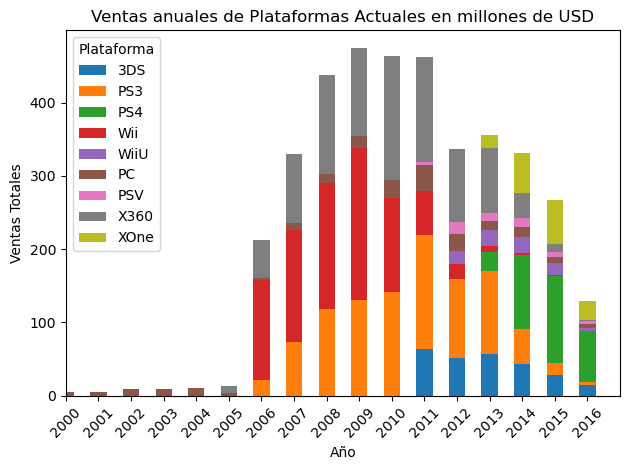

In [101]:
#Grafico para visualizar el crecimiento de las plataformas actuales
plt.figure(figsize=(100, 15))
plataformas_actuales.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.title("Ventas anuales de Plataformas Actuales en millones de USD")
plt.legend(title='Plataforma')
#plt.grid(axis='y')
plt.xlim([20, 37])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aqui se puede apreciar que desde 2006 en adelante, las ventas de videojuegos en distintas plataformas se disparan por el lanzamiento de la PS3 y sobre todo de la consola Wii, sin embargo, a 2016 las plataformas más vendidas son otras, como la PS4 y XOne. De esta forma, y visualizando el gráfico es que la base de datos se recortará para utilizarla desde el año 2012 en adelante y así obtener un modelo de estimación para el año 2017.

* Dentro de estas plataformas las que se reducen hacia 2016 son 3DS, PS3, Wii, WiiU, PSV, X360.
* La plataforma que hacia 2016 presentan un crecimiento es PS4
* plataformas potencialmente rentables son PS4, XOne y PC. 

In [102]:
#ajusto el DF a solo datos desde el 2012 en adelante
df_actuales = df_games[df_games['year_of_release'] >= 2012].reset_index(drop=True)
df_actuales



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


In [103]:
#elimino las plataformas que no son de interés 
df_actuales = df_actuales.drop(df_actuales[df_actuales['platform'] == 'PSP'].index)
df_actuales = df_actuales.drop(df_actuales[df_actuales['platform'] == 'DS'].index)
df_actuales = df_actuales.drop(df_actuales[df_actuales['platform'] == 'PS3'].index)
df_actuales = df_actuales.drop(df_actuales[df_actuales['platform'] == '3DS'].index)
df_actuales = df_actuales.drop(df_actuales[df_actuales['platform'] == 'Wii'].index)
df_actuales = df_actuales.drop(df_actuales[df_actuales['platform'] == 'WiiU'].index)
df_actuales = df_actuales.drop(df_actuales[df_actuales['platform'] == 'PSV'].index)
df_actuales = df_actuales.drop(df_actuales[df_actuales['platform'] == 'X360'].index).reset_index(drop=True)


In [104]:
#compruebo que solo tengo las plataformas potencialmente rentables
df_actuales['platform'].unique() #guardo en una variable para graficar más adelante


array(['PS4', 'XOne', 'PC'], dtype=object)

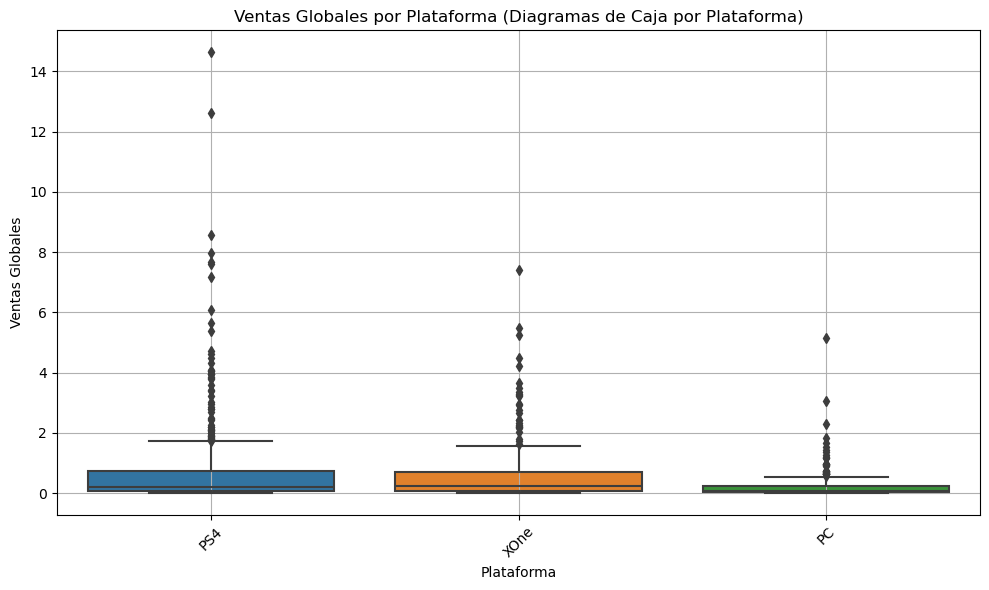

In [105]:
#Diagrama de caja de las 3  platafromas potencialmente rentables
# Crear el diagrama de caja utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_actuales, x='platform', y='total_sales')
plt.title('Ventas Globales por Plataforma (Diagramas de Caja por Plataforma)')
plt.ylabel('Ventas Globales')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Es posible observar diferencias significativas en las ventas, sobretodo en los valores atípicos, donde PS4 registra más de 14 millones de USD en un juego, sin embargo, las ventas promedio de estas 3 plataformas son relativamente parecidas. 

---

#### Reseñas de los usuarios 

Se observará cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular, en eset caso PS4. 

In [106]:
#ajusto la base de datos con las plataformas potencialmente rentables (df_actuales) para que solo me enseñe PS4
df_actuales_ps4 = df_actuales[df_actuales['platform'] == 'PS4'].reset_index(drop=True)
df_actuales_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
387,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,unknown,0.01
388,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
389,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
390,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


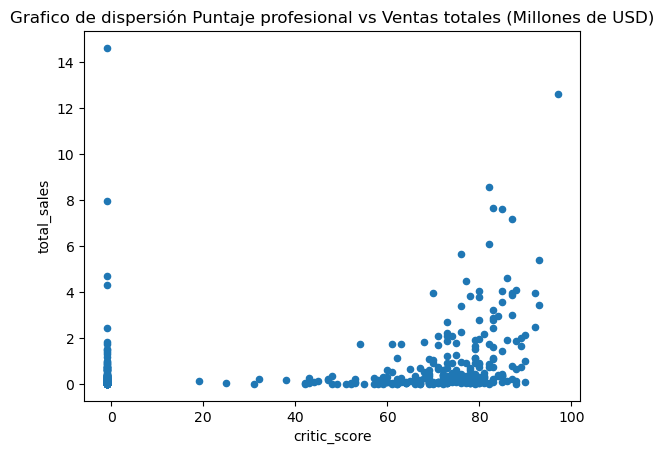

Coeficiente de correlación es:  0.2265260661461235


In [107]:
#gráfico de dispersión con las reseñas profesionales
df_actuales_ps4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Grafico de dispersión Puntaje profesional vs Ventas totales (Millones de USD)')
plt.show()

#coeficiente de correlación 
print('Coeficiente de correlación es: ', df_actuales_ps4['critic_score'].corr(df_actuales_ps4['total_sales']))

Se observa a partir del gráfico y del coeficiente de correlación que para la plataforma PS4, no existe una fuerte correlación entre el puntaje otorgado por la crítica profesional y la cantidad  de ventas alcanzadas. 
Es importante mencionar, que incluso algunos juegos que no fueron rankeados (aquellos sin puntaje y que en este trabajo se les asignó un -1), han logrado ventas exorbitantes. 

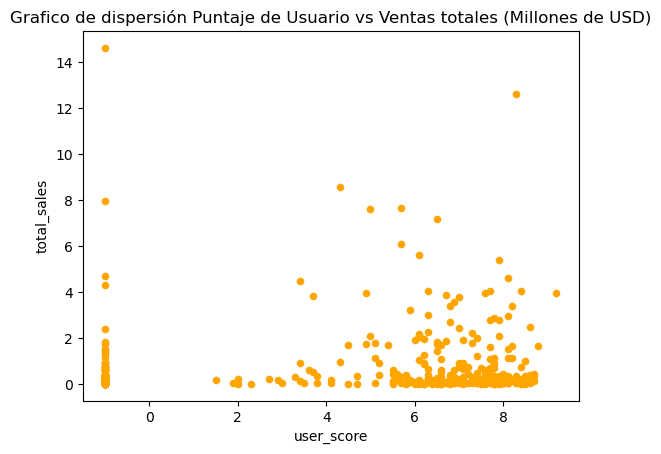

Coeficiente de correlación es:  0.11596149312860092


In [108]:
#gráfico de dispersión con las reseñas de usuarios
df_actuales_ps4.plot(x='user_score', y='total_sales', kind='scatter', color='orange')
plt.title('Grafico de dispersión Puntaje de Usuario vs Ventas totales (Millones de USD)')
plt.show()

#coeficiente de correlación 
print('Coeficiente de correlación es: ', df_actuales_ps4['user_score'].corr(df_actuales_ps4['total_sales']))

Se observa que para el puntaje asignado por usuarios ocurre lo mismo que en los puntajes de critica profesional de los juegos para la plataforma PS4. 

In [109]:
#comparacion con la plataforma XOne 
df_actuales_xone = df_actuales[df_actuales['platform']== 'XOne'].reset_index()
df_actuales_xone

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,6,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1,-1.0,unknown,7.39
1,10,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
2,12,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
3,16,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
4,19,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,881,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
243,883,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1,6.6,E,0.01
244,884,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01
245,885,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,unknown,0.01


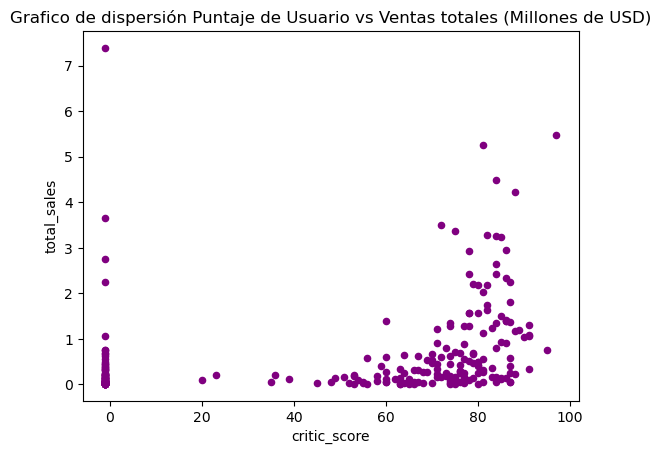

Coeficiente de correlación es:  0.27378217261702115


In [110]:
#gráfico de dispersión con las reseñas profesionales
df_actuales_xone.plot(x='critic_score', y='total_sales', kind='scatter', color='purple')
plt.title('Grafico de dispersión Puntaje de Usuario vs Ventas totales (Millones de USD)')
plt.show()

#coeficiente de correlación 
print('Coeficiente de correlación es: ', df_actuales_xone['critic_score'].corr(df_actuales_xone['total_sales']))

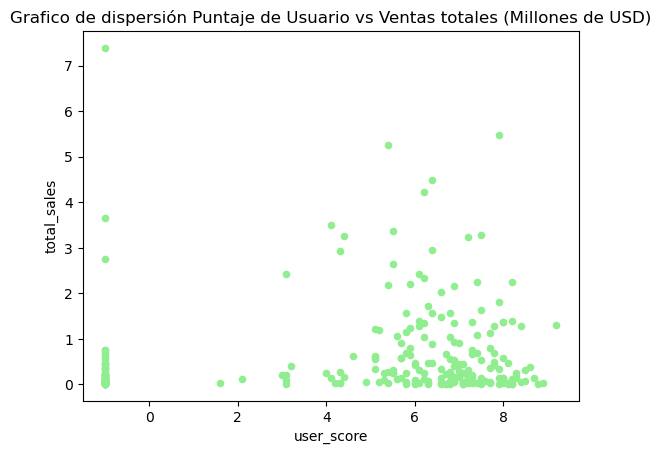

Coeficiente de correlación es:  0.12171152458232884


In [111]:
#gráfico de dispersión con las reseñas de usuarios
df_actuales_xone.plot(x='user_score', y='total_sales', kind='scatter', color='lightgreen')
plt.title('Grafico de dispersión Puntaje de Usuario vs Ventas totales (Millones de USD)')
plt.show()

#coeficiente de correlación 
print('Coeficiente de correlación es: ', df_actuales_xone['user_score'].corr(df_actuales_xone['total_sales']))

Para el caso de la plataforma XOne, ocurre lo mismo que para PS4. 

En definitiva parece no estar directamente relacionada la cantidad de ventas logradas por las plataformas, con el puntaje otorgado por la critica o los usuarios hacia los juegos. 

---

#### Distribución general de los videojuegos por género

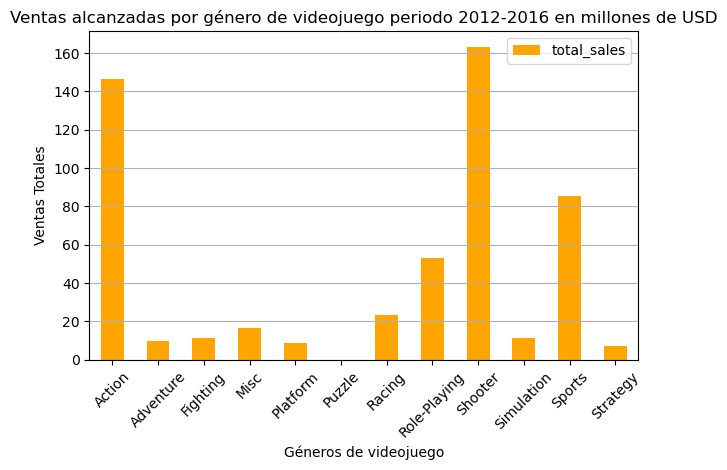

In [112]:
#ventas de los juegos segun género
df_genre = df_actuales.groupby('genre')['total_sales'].sum().reset_index()

#gráfico de barras para visualizar la cantidad de ventas logradas por género de videojuego
df_genre.plot(x='genre', y='total_sales', kind='bar', color='orange')
plt.xlabel('Géneros de videojuego')
plt.ylabel('Ventas Totales')
plt.title("Ventas alcanzadas por género de videojuego periodo 2012-2016 en millones de USD")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

El género más vendido dentro de los videojuegos de las plataformas potencialmente rentables (PS4, XOne y PC) son 'Shooter', seguido de juegos de Acción y luego género 'Sports', con gran diferencia, quien le sigue son los juegos de Rol Playing. Es importante considerar que estas ventas corresponden a las obtenidas desde 2012 hasta 2016. 

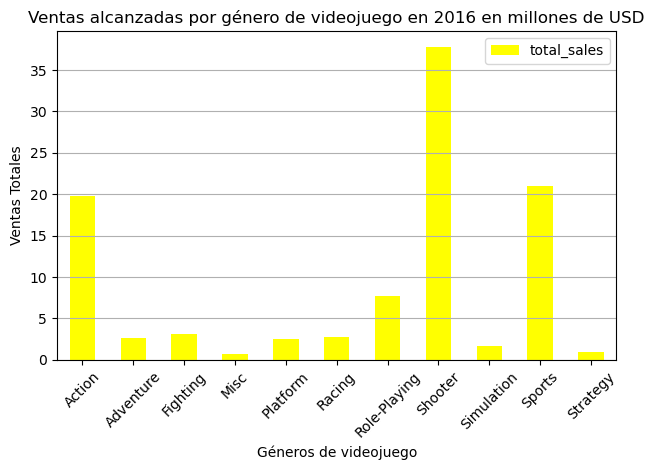

In [113]:
#si cosideramos los generos más vendidos solamente en 2016
df_actuales_2016 = df_actuales[df_actuales['year_of_release']==2016]

#ventas de los juegos segun género
df_genre_2016 = df_actuales_2016.groupby('genre')['total_sales'].sum().reset_index()

#gráfico de barras para visualizar la cantidad de ventas logradas por género de videojuego
df_genre_2016.plot(x='genre', y='total_sales', kind='bar', color='yellow')
plt.xlabel('Géneros de videojuego')
plt.ylabel('Ventas Totales')
plt.title("Ventas alcanzadas por género de videojuego en 2016 en millones de USD")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

Las mayores ventas en 2016 para las plataformas PS4, XOne y PC, siguen siendo los géneros Shooter, Action y Sport, solo que Sport supera por poco al género Action y Shooter se dispara de manera sobresaliente. 

Considerando entonces las ventas a lo largo de 4 años y también las ventas producidas solo para 2016, se podria decir que en general los géneros mas rentables serían sin duda 'Shooter', 'Action' y 'Sport', quedandose muy por debajo géneros como 'Strategy', 'Simulation', 'Misc' y 'Adventure', los que se podrían considerar poco rentables. 

---

#### Perfil de Usuario para las regiones de Norteamérica, Europa y Japón. 

Se creará un perfil de usuario para cada region considerando solamente los datos de 2016. Se determinará las 5 plataformas más usadas por los usuarios en cada región, los géneros principales que consumen y se analizará si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [114]:
#e ajusta la base de datos a 2016
videojuegos_2016 = df_games[df_games['year_of_release'] == 2016].reset_index(drop=True)
videojuegos_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
1,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1,-1.0,unknown,7.14
2,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
3,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77,3.4,M,4.47
4,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88,8.4,M,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...
497,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
498,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
499,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
500,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


In [115]:
#norteamerica: plataformas más populares 
videojuegos_2016.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False)

platform
PS4     21.49
XOne    14.27
3DS      4.14
WiiU     2.10
PC       1.36
X360     0.69
PS3      0.67
PSV      0.15
Wii      0.06
Name: na_sales, dtype: float64

In [116]:
#géneros principales para norteamerica
videojuegos_2016.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False)

genre
Shooter         16.24
Action           9.29
Sports           7.54
Role-Playing     5.89
Fighting         1.84
Platform         1.29
Adventure        0.95
Misc             0.76
Racing           0.73
Strategy         0.24
Simulation       0.16
Puzzle           0.00
Name: na_sales, dtype: float64

In [117]:
#europa: plataformas más populares 
videojuegos_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
PS4     31.78
XOne     9.63
PC       3.53
3DS      2.33
WiiU     1.48
PS3      1.26
X360     0.71
PSV      0.39
Wii      0.11
Name: eu_sales, dtype: float64

In [118]:
#géneros principales de europa
videojuegos_2016.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False)

genre
Shooter         15.90
Sports          12.01
Action          10.68
Role-Playing     4.28
Racing           1.77
Platform         1.39
Fighting         1.34
Adventure        1.32
Simulation       1.27
Misc             0.66
Strategy         0.59
Puzzle           0.01
Name: eu_sales, dtype: float64

In [119]:
#japón: plstaformas más populares. 
videojuegos_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3DS     8.03
PS4     5.74
PSV     3.56
PS3     1.30
WiiU    0.67
XOne    0.01
PC      0.00
Wii     0.00
X360    0.00
Name: jp_sales, dtype: float64

In [120]:
#géneros principales de japón
videojuegos_2016.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False)

genre
Action          7.07
Role-Playing    6.61
Adventure       1.18
Shooter         1.06
Misc            1.04
Sports          0.92
Fighting        0.75
Simulation      0.33
Strategy        0.23
Platform        0.11
Racing          0.01
Puzzle          0.00
Name: jp_sales, dtype: float64

Las plataformas más populares en Norteamerica corresponden a: PS4, XOne, 3DS, WiiU y PC, dentro de las cuales los usuarios prefieren los géneros de Shooter, Action, Sports, Role-Playing y Fighting.

Las plataformas más populares en Europa son las mismas que en Nortreamérica, solo que el orden preferencial es distinto, en primer lugar está PS4 y XOne, pero luego se prefiere PC, 3DS y WiiU. Con respecto a los géneros de videojuegos, Europa también se inclina primeramente por juegos de Shooter, pero luego el género más consumido es Sports (a diferencia de Norteamérica), seguido de Action, Role-Playing y Racing.  

Finalmente, las plataformas más populares en Japón encabezan la lista con 3DS, luego PS4, PSV, PS3 y WiiU. Los géneros más consumidos por los japoneses son: Action, Role-Playing, Adventure, Shooter y Misc. 

In [121]:
#Comprobar si la clasificación ESRB de los juegos hace variar las ventas por regiones
videojuegos_2016['rating'].unique()

array(['E', 'unknown', 'T', 'M', 'E10+'], dtype=object)

In [122]:
#vistazo de las ventas de género de Action por ESRB
action = videojuegos_2016[videojuegos_2016['genre']=='Action']
action[action['rating']== 'M'][['na_sales', 'eu_sales', 'jp_sales']].sum()


na_sales    3.70
eu_sales    5.00
jp_sales    0.15
dtype: float64

En un simple análisis de los juegos con clasificación 'M' (Maduro +17), existe una disminución considerable de las ventas en la región de Japón, a diferencia de Norteamérica o Europa, esto puede ser indicativo de que tanto en Norteamérica como en Europa son más adultos los que juegan videojuegos o, si bien los juegos poseen esta clasificación +17, existe público más joven que aun así los juegan. 

---

#### Pruebas estadísticas 


En este apartado vamos a poner a prueba dos hipótesis:

1) Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

2) Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Para el primer caso, se utilizará una prueba de hipótesis de dos colas, para mostrar si la media de estas dos poblaciones son distintas (tanto mayor o menor)
* H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
* H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes
Se utilizará un valor umbral alfa de 5%. 

In [123]:
#datos para xOne
juegos_xone = videojuegos_2016[videojuegos_2016['platform']=='XOne'] # filtro la base de datos a solo plataforma XOne
juegos_xone = juegos_xone[juegos_xone['user_score']>= 0] #saco las filas que no poseen calificación, que antes se asignaron con un -1
user_score_xone = juegos_xone['user_score'] #obtengo un series con los datos para utilizar en la prueba de hipotesis
user_score_xone

6      5.5
7      3.1
9      8.2
10     6.9
19     6.2
      ... 
474    8.2
479    6.8
486    8.2
487    6.6
491    6.7
Name: user_score, Length: 66, dtype: float64

In [124]:
# datos para PC 
juegos_pc = videojuegos_2016[videojuegos_2016['platform']=='PC'] # filtro la base de datos a solo plataforma PC
juegos_pc = juegos_pc[juegos_pc['user_score']>= 0] #saco las filas que no poseen calificación, que antes se asignaron con un -1
user_score_pc = juegos_pc['user_score'] #obtengo un series con los datos para utilizar en la prueba de hipotesis
user_score_pc

44     8.0
52     6.8
61     5.8
67     7.6
86     7.5
103    7.3
109    7.1
127    3.2
135    4.8
153    3.0
157    7.3
167    7.9
172    6.0
178    4.2
190    5.7
202    4.3
215    6.9
218    8.0
228    8.6
233    4.4
252    2.9
255    8.2
258    6.9
275    7.5
286    8.6
297    8.0
307    7.0
308    3.5
317    4.8
326    6.1
330    6.3
332    8.7
348    6.1
395    3.7
398    2.4
401    8.5
430    4.3
435    6.2
437    6.3
445    6.8
451    7.3
457    7.1
463    7.1
466    6.8
475    7.9
Name: user_score, dtype: float64

In [127]:
#prueba de hipótesis 
alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.3516273078893254
No podemos rechazar la hipótesis nula


El valor de p es mayor al umbral de significancia por lo que no podemos rechazar la hipótesis de que las calificaciones promedio para las plataformas XOne y PC son las mismas. 

Para el segundo caso, se utilizará una prueba de hipótesis de dos colas también, para mostrar si la media de estas dos poblaciones son distintas (tanto mayor o menor)
* H0: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son las mismas
* H1: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes
Se utilizará un valor umbral alfa de 5%. 

In [128]:
#datos para juegos de Acción
action = action[action['user_score']>= 0] #saco las filas que no poseen calificación, que antes se asignaron con un -1
user_score_action = action['user_score'] #obtengo un series con los datos para utilizar en la prueba de hipotesis
user_score_action

8      6.3
13     5.1
15     4.5
24     7.8
27     8.4
      ... 
468    2.3
477    5.5
479    6.8
490    8.5
491    6.7
Name: user_score, Length: 85, dtype: float64

In [132]:
#datos para juegos de deportes
juegos_sport = videojuegos_2016[videojuegos_2016['genre']=='Sports'] # filtro la base de datos a solo plataforma XOne
juegos_sport = juegos_sport[juegos_sport['user_score']>= 0] #saco las filas que no poseen calificación, que antes se asignaron con un -1
user_score_sport = juegos_sport['user_score'] #obtengo un series con los datos para utilizar en la prueba de hipotesis
user_score_sport

0      5.0
6      5.5
12     6.7
14     4.9
22     5.9
28     6.2
31     6.2
39     3.3
48     6.9
56     7.6
59     6.0
69     1.7
73     8.7
84     5.8
93     6.6
100    5.5
104    4.0
106    8.3
132    0.7
148    4.1
158    7.2
159    2.0
175    3.4
178    4.2
179    0.2
255    8.2
264    7.8
277    6.1
296    6.8
311    6.5
317    4.8
384    4.5
395    3.7
417    6.0
429    7.1
437    6.3
487    6.6
Name: user_score, dtype: float64

In [133]:
#prueba de hipótesis 
alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(user_score_action, user_score_sport, equal_var=False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.002025023028063322
Rechazamos la hipótesis nula


El valor de p es mucho más bajo que el nivel de significancia por lo que se debe rechazar la hipótesis nula de que las calificaciones promedio para las plataformas XOne y PC son las mismas.  Asi que se acepta la hipótesis alternativa, las calificaciones de usuarios para los géneros de Acción y Deportes son distintas. 

---

# CONCLUSIONES GENERALES DEL PROYECTO 
#### Parte 1: Conclusiones generales de las ventas

* A través de la visualización de la cantidad de juegos lanzados por año, se tiene registro desde el año 1980 hasta 2016, donde 1980 es el año con menos lanzamientos de juegos, registrados solo 9. Por otro lado, los años 2008 y 2009 fueron aquellos con más juegos lanzados, con una cantidad de 1427 y 1426 respectivamente, siguiendoles el año 2010 con 1255. 
* El año 2016 (a la fecha de obtenida esta base de datos), registra solo 502 videojuegos lanzados. 
* Existen 269 juegos sin registro de su año de lanzamiento, de un total de 16715. 

Las plataformas con mayores ventas totales registradas en millones de dolares estadounidenses a la fecha en la base de datos (años 1980-2016), han sido
* PS2 = 1255.77
* X360 = 971.42
* PS3 = 939.65
* Wii = 907.51
* DS = 806.12
* PS = 730.86
* GBA = 317.85

Seguidas de PS4 con 314.14 millones de dólares estadounidenses. Cabe destacar que estas ventas totales incluyen solamente las regiones de Norteamérica, Europa y Japón.

Las plataformas con menos recaudación total (en millones de dólares estadounidenses), por ventas han sido:
* PCFX = 0.03
* GG =	0.04
* 3DO = 0.10
* TG16 = 0.16
* WS = 1.42
* NG = 1.44
* SCD = 1.86

---

### Parte 2: Conclusiones para el modelo de ventas 2017

* Existen, a la fecha de obtenida esta base de datos, 9 plataformas que al año 2016 siguen activas en el mercado (registran ventas). Se puede observar que no existe un patrón dependiente del año de lanzamiento de las plataformas que determine si estas son exitosas o no, ya que se ve una gran variabilidad en este aspecto. Desde 3 años hasta décadas de permanencia en el mercado. Las plataformas activas son: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne. De estas, las que se reducen hacia 2016 son 3DS, PS3, Wii, WiiU, PSV, X360. La plataforma que hacia 2016 presentan un crecimiento es PS4.
* En definitiva, las plataformas potencialmente rentables hacia 2017 son PS4, XOne y PC. 
* Se observó que desde 2012 hacia 2016 el promedio en ventans de estas tres plataformas fue casi el mismo, exceptuando algunos valores atípicos, sobre todo de la plataforma PS4. 
* En estudios de dispersion con datos desde 2012 a 2016 se determina que no existe una correlación entre el puntaje otorgado por los usuarios o la crítica profesional hacia las plataformas y las ventas que estas consiguen. Al menos para PS4 o XOne. 
* Dentro del estudio de perfil de usuario de las tres regiones principales de ventas de videojuegos se concluye que: 
1) Las plataformas más populares en Norteamerica corresponden a: PS4, XOne, 3DS, WiiU y PC, dentro de las cuales los usuarios prefieren los géneros de Shooter, Action, Sports, Role-Playing y Fighting.

2) Las plataformas más populares en Europa son las mismas que en Nortreamérica, solo que el orden preferencial es distinto, en primer lugar está PS4 y XOne, pero luego se prefiere PC, 3DS y WiiU. Con respecto a los géneros de videojuegos, Europa también se inclina primeramente por juegos de Shooter, pero luego el género más consumido es Sports (a diferencia de Norteamérica), seguido de Action, Role-Playing y Racing.  

3) Las plataformas más populares en Japón encabezan la lista con 3DS, luego PS4, PSV, PS3 y WiiU. Los géneros más consumidos por los japoneses son: Action, Role-Playing, Adventure, Shooter y Misc.

4) Además, se logró identificar que al menos en Japón si existe una relación de las ventas con la clasificación ESRB de los juegos. En Japón se consume mucho más  juegos con clasificación 'E', que juegos con clasificacion 'M', al contrario que Norteamérica o Europa. 

* Finalmente, para las pruebas estadiísticas se concluye que NO podemos rechazar la hipótesis nula de que las calificaciones promedio para las plataformas XOne y PC son las mismas y DEBEMOS rechazar la hipótesis nula de que las calificaciones promedio para las plataformas XOne y PC son las mismas.  Asi que se acepta la hipótesis alternativa, las calificaciones de usuarios para los géneros de Acción y Deportes son distintas. 

